#  Bernstein–Vazirani algorithm
Based On: [Official QISKIT Community Tutorial](https://github.com/Qiskit/qiskit-community-tutorials) 

The **Bernstein–Vazirani algorithm**, which solves the Bernstein–Vazirani problem is a quantum algorithm invented by Ethan Bernstein and Umesh Vazirani in 1992. It's a restricted version of the **Deutsch–Jozsa algorithm** where instead of distinguishing between two different classes of functions, it tries to learn a string encoded in a function. 
The Bernstein–Vazirani algorithm was designed to prove an oracle separation between complexity classes **BQP and BPP**.[SOURCE](https://en.wikipedia.org/wiki/Bernstein%E2%80%93Vazirani_algorithm)

### Problem Statement:
say you have a **n** digit number *(we will handle binary)*: (1010010101001........)  . 
How can a classical computer find this number??
To give an example: say the number is 111000
We can:
* start from 000000
* increse by 1 
* get the difference
* when diff==0 found number.
But that would take **2^6=64** tries (worst case).
**COMPUTERS ARE SMART**(Even classical ones)
It would actually find the number in **6** steps.
What it would do is :
* take the number of bits in the number and do **AND operation** with the secret number:
    
        111000
        000001
        ------
        000000  <-- Bit Wise And Operation
        
* now just from the result it can say that the last digit is **0** because if it was **1** the last digit of the and would be **1**
* then for the second digit:
        
        111000
        000010
        ------
        000000
        
* and till the last digit:
        
        111000
        100000
        ------
        100000

Ok that was good. So a digit of length **n can be found in n** shots.

**NOW IS THE COOl PART**  
A quantum computer can find this number of any length with *(yes you guessed that right)* **1** shot. 

This algorithm is a good demonstration of how a quantum computer outperforms a classical computer.
 

In [3]:
SHOT=1
SECRET_NUMBER='10100110'
NBITS=len(SECRET_NUMBER)

### Create Circuit
* Create a circuit with: **NBITS+1 quantum** registers and **NBITS classical** registers
* Apply **Hadamard Gate** for **NBITS**
* Apply **X Gate** followed by a **Hadamard Gate** to the last QBIT
* Apply a **Controlled X gate** when ever you see a **1** in the secret number to the last **QBIT**
* Apply **Hadamard Gate** for **NBITS**
* Add measurements for the NBITS    

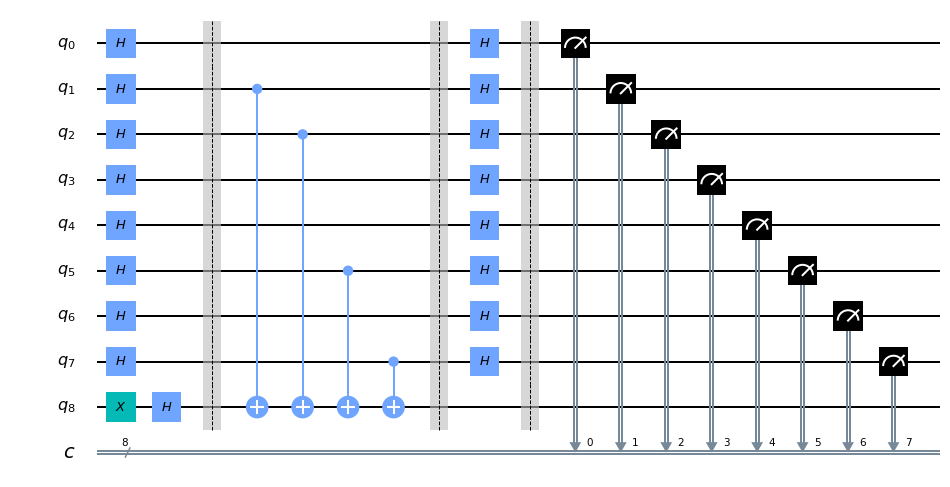

In [5]:
from qiskit import *
%matplotlib inline
# build circuit
circuit=QuantumCircuit(NBITS+1,NBITS)

# apply hadamard gates
circuit.h(range(NBITS))
# last QBIT
circuit.x(NBITS)
circuit.h(NBITS)

circuit.barrier()

# Number Box
for idx,value in enumerate(reversed(SECRET_NUMBER)):
    if value=='1':
        circuit.cx(idx,NBITS)

circuit.barrier()

# hadamard + measurements
circuit.h(range(NBITS))
circuit.barrier()
circuit.measure(range(NBITS),range(NBITS))

circuit.draw(output='mpl')

## MOMENT OF TRUTH

In [9]:
# now simulate to see the results
simulator=Aer.get_backend('qasm_simulator')

result=execute(circuit,backend=simulator,shots=SHOT).result()

counts=result.get_counts()

print('THE SECRET NUMBER IS:{}'.format(counts.keys()))


THE SECRET NUMBER IS:dict_keys(['10100110'])


# RUN IN ACTUAL HARDWARE:
Unlike the previous Quantum Teleportation work we will select the device a bit fine tuned . Add necessary codes to execute the job as a prectice. Use Job monitors as well. 
## FUNFACT: THERE WILL BE ERRORS UNLIKE THE IDEAL SIMULATOR CASE

In [10]:

IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= (NBITS+1)
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)


ibmq_16_melbourne


In [11]:
import qiskit.tools.jupyter
%qiskit_copyright